In [1]:
# to import libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [43]:
# to read the file

# gunv is the dataset which we parsed from gun violence archives. We included python file
# with code that exracts and cleans data from gunviolence https://www.gunviolencearchive.org.
# datas is the dataset which we downloaded from kaggle.com
gunv = pd.read_csv('gunviolence.csv')
datas = pd.read_csv("violenceG.csv")


In [44]:
# this will give us the first five rows of the data which
# we parsed from https://www.gunviolencearchive.org
gunv.head()

,State,Total Number of Incidents,Number of Deaths,Number of Injuries,Number of Children,Number of Teens,Mass Shooting,Officer Involved Incident,Home Invasion,Defensive Use,Unintentional Shooting
0,Alabama,"6,118","2,137","3,498",110,303,41,190,245,262,217
1,Alaska,"1,514",300,365,20,36,1,42,78,66,71
2,Arizona,"2,618","1,263","1,260",46,135,18,340,127,154,150
3,Arkansas,"3,298",900,"1,572",43,157,16,106,142,113,134
4,California,"18,448","6,348","8,688",186,862,185,"1,291",545,450,460


In [45]:
#first we will start by looking at the description of the two datsets
#by looking at different functions like describe, shape and size
#to have an idea about the size and values of the two datasets
columns = gunv.columns
columns1=datas.columns
columns


Index(['State', 'Total Number of Incidents', 'Number of Deaths',
       'Number of Injuries', 'Number of Children ', 'Number of Teens',
       'Mass Shooting', 'Officer Involved Incident', 'Home Invasion',
       'Defensive Use', 'Unintentional Shooting'],
      dtype='object')

In [46]:
# data type of our dataset
gunv.get_dtype_counts()


int64     5
object    6
dtype: int64

In [47]:
#length of dataset created by us
len_datas=len(datas)
len_gunv=len(gunv)
len_gunv


50

In [48]:
# shape of the dataset, this shows numbers of rows and columns
gunv.shape

(50, 11)

In [49]:
# size of the dataset
gunv.size

550

In [50]:
# it gives the brief information about the dataset
gunv.describe()

,Number of Children,Mass Shooting,Home Invasion,Defensive Use,Unintentional Shooting
count,50.000000,50.000000,50.000000,50.0000,50.000000
mean,64.000000,33.260000,240.460000,172.8000,183.980000
std,66.936156,41.174001,206.437638,175.3044,146.687435
min,0.000000,0.000000,6.000000,9.0000,8.000000
25%,15.500000,4.000000,82.500000,47.5000,73.500000
50%,42.000000,16.500000,142.000000,120.0000,142.000000
75%,102.750000,48.500000,363.000000,255.0000,257.000000
max,298.000000,185.000000,883.000000,862.0000,666.000000


In [51]:
# information about dataset
gunv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 11 columns):
State                        50 non-null object
Total Number of Incidents    50 non-null object
Number of Deaths             50 non-null object
Number of Injuries           50 non-null object
Number of Children           50 non-null int64
Number of Teens              50 non-null object
Mass Shooting                50 non-null int64
Officer Involved Incident    50 non-null object
Home Invasion                50 non-null int64
Defensive Use                50 non-null int64
Unintentional Shooting       50 non-null int64
dtypes: int64(5), object(6)
memory usage: 4.4+ KB


In [52]:
# we replacing the space in the column names with underscore to make it easier to use
gunv.columns = gunv.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')


In [53]:
# We convert the columns that are represented as object to float
gunv['total_number_of_incidents'] = gunv.total_number_of_incidents.str.replace(',', '').astype(float)
gunv['number_of_deaths'] = gunv.number_of_deaths.str.replace(',', '').astype(float)
gunv['number_of_injuries'] = gunv.number_of_injuries.str.replace(',', '').astype(float)
gunv['number_of_teens'] = gunv.number_of_teens.str.replace(',', '').astype(float)
gunv['officer_involved_incident'] = gunv.officer_involved_incident.str.replace(',', '').astype(float)


In [54]:
# We double check the type of columns, we can see that they have been changed to float
gunv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 11 columns):
state                        50 non-null object
total_number_of_incidents    50 non-null float64
number_of_deaths             50 non-null float64
number_of_injuries           50 non-null float64
number_of_children           50 non-null int64
number_of_teens              50 non-null float64
mass_shooting                50 non-null int64
officer_involved_incident    50 non-null float64
home_invasion                50 non-null int64
defensive_use                50 non-null int64
unintentional_shooting       50 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 4.4+ KB


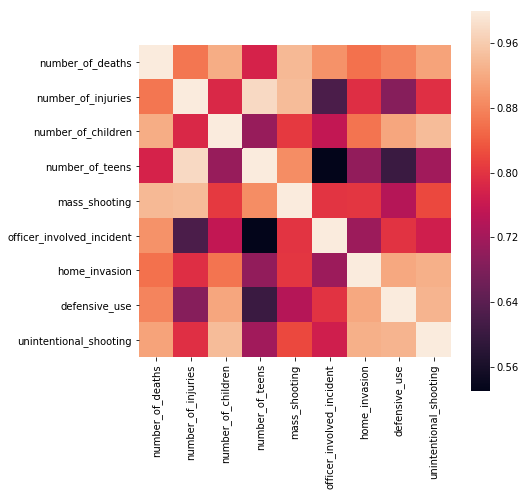

In [55]:

#This plot shows the correlations between the all the colums, represented in colors
#the brightest colors have the best correlations between the columns 
corr = gunv.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].corr()
plt.figure(figsize=(7, 7))
sns.heatmap(corr, vmax=1, square=True)

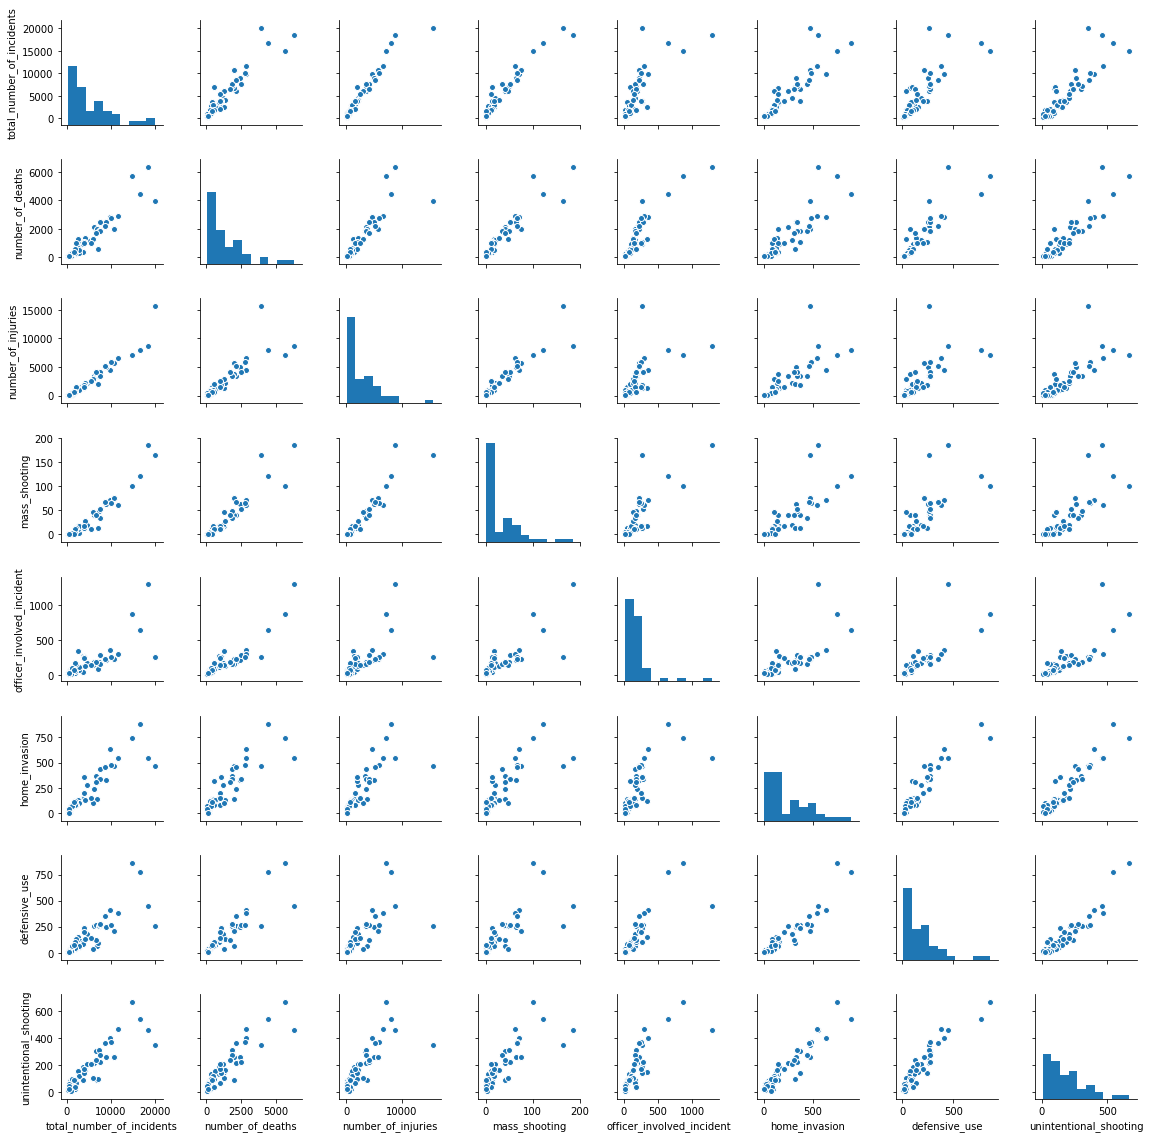

In [56]:
#the following plots show the correlations between the coloumns, represented in scatter 
#plots,from which we can see the correlation between each two columns in our dataset 
#There are intresting correlations in our datastarting by the correlatuions with
#total number of incidents, which seem to have positive correlation with almost all
#the other variables particularly number of deaths, injuries, mass shooting and 
#unintentional shooting. This show that in most of our data there is relationship 
#between the number of incidents that occurred in each state with the other variables
#being important factor of those incidents. Then, the number of injuries and deaths 
#also have positive linear correlations with mass shooting, home invasion and 
#uningentional shooting. Which also makes sense when we talk about gun violence 
#all those factors are related. Mass shooting is also intresting variable as it has
#positive linear relationship with total number of incidents, inturies and death
#this happen because the increase in mass shooting will incease those variables
#there are other noticeable linear relationshps such as the rekationship between 
#home invasions and unintentional shooting, which means that one of the reasons of 
#unintentional shooting is the invasion of houses where people tend to react by shooting
#the people who try enter their houses ilegally. Also, there is i tresting positive linear 
#relationship between officers involved in incidents and mass shooting, which means that
#the more involvement of the plice thre tend tobe more mass shooting. In general, we tried
#to show that this dataset variables have a lot of poaitive correlations that can explain
#some of the main reasons of gun violence in the united states.
cols = ['total_number_of_incidents','number_of_deaths','number_of_injuries',
         'mass_shooting','officer_involved_incident','home_invasion', 'defensive_use','unintentional_shooting']
sns.pairplot(gunv[cols], size = 2.0)
plt.show();

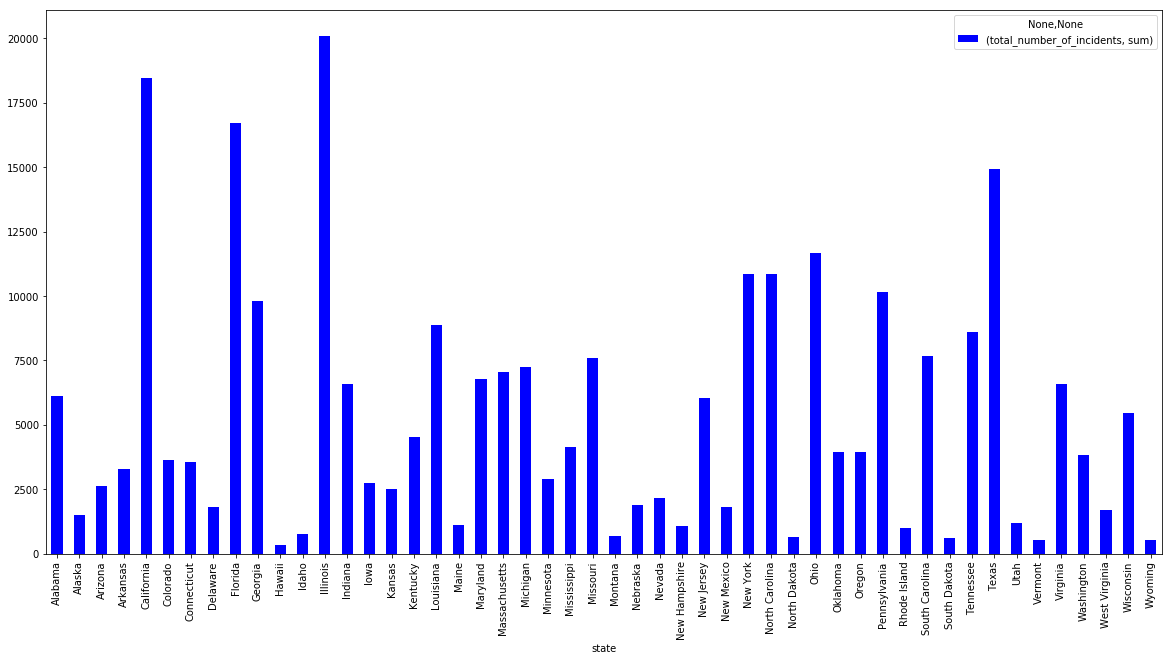

In [57]:
#this plot shows the total number of incidents per state, As we can see
#the top states are Illinois, California, Florida and Texas.
df3=gunv.groupby('state').agg({'total_number_of_incidents':['sum']}).plot.bar(figsize=(20,10), colormap='winter')


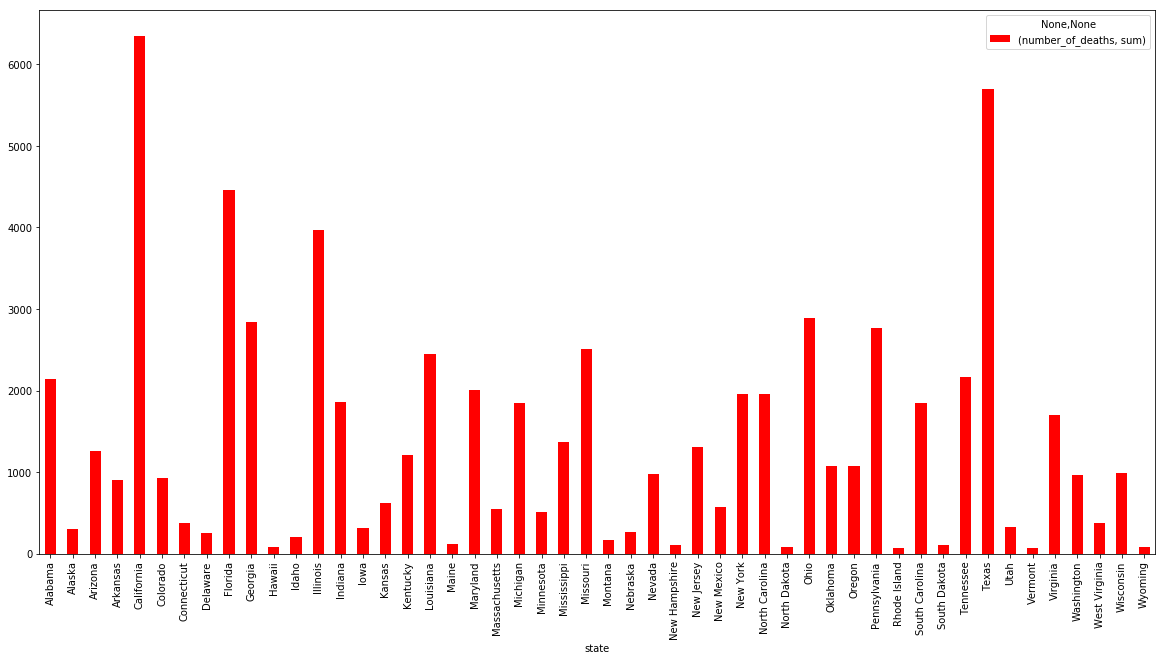

In [58]:
#this plot shows the total number of deaths per state, As we can see
#the top states are California, Florida,Texas and Illinois.The same
#states in the previous plot but not in the same order. this indicate
#that there is tren here where those states have more shootings and incidents
df3=gunv.groupby('state').agg({'number_of_deaths':['sum']}).plot.bar(figsize=(20,10), colormap='autumn')


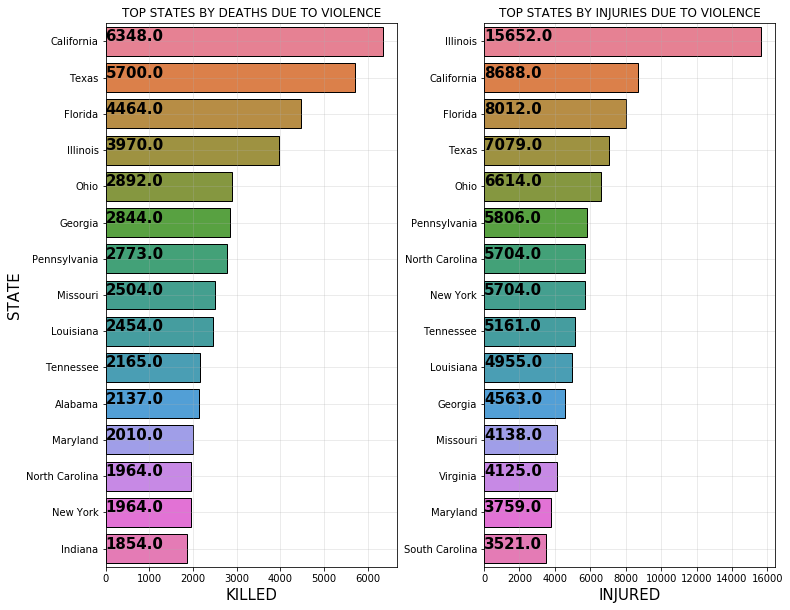

In [59]:
#this time we tried to plot two graphs, which are the top states by deaths
#and top staes by injuries, to compare them. From the two plots we can see
#that the same previous four states are showing again.
state_kill   = gunv.groupby("state")["number_of_deaths"].sum().reset_index().sort_values(by="number_of_deaths",ascending=False)
state_injury = gunv.groupby("state")["number_of_injuries"].sum().reset_index().sort_values(by="number_of_injuries",ascending=False)

fig = plt.figure(figsize=(12,10))
plt.subplot(121)
ax = sns.barplot("number_of_deaths","state",
                 data=state_kill[:15],palette="husl",
                 linewidth=1,edgecolor = "k"*15)
plt.ylabel("STATE",fontsize=15)
plt.xlabel("KILLED",fontsize=15)
plt.title("TOP STATES BY DEATHS DUE TO VIOLENCE")
for i,j in enumerate(state_kill["number_of_deaths"][:15]):
    ax.text(.9,i,j,weight="bold",fontsize=15)
plt.grid(True,alpha= .3)

plt.subplot(122)
ax = sns.barplot("number_of_injuries","state",
                 data=state_injury[:15],palette="husl",
                linewidth=1,edgecolor = "k"*15)
plt.ylabel("")
plt.xlabel("INJURED",fontsize=15)
plt.subplots_adjust(wspace=.3)
plt.title("TOP STATES BY INJURIES DUE TO VIOLENCE")
for i,j in enumerate(state_injury["number_of_injuries"][:15]):
    ax.text(.9,i,j,weight="bold",fontsize=15)
plt.grid(True,alpha= .3)
    
fig.set_facecolor("w")

SIZES = INJURED ,COLOR = KILLED
********************************


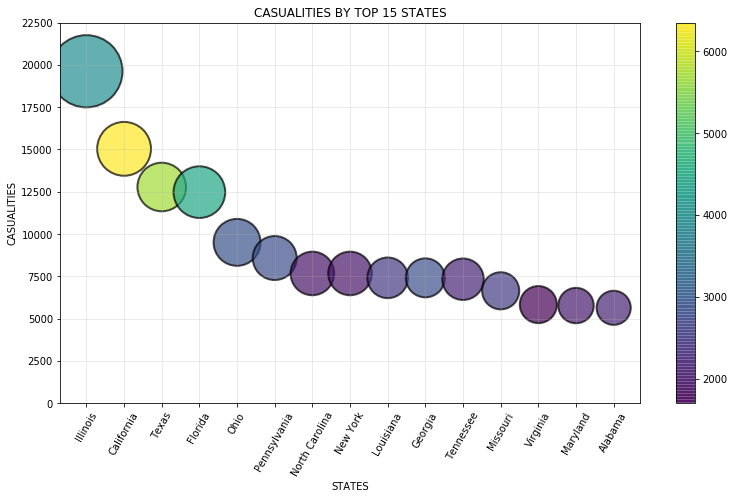

In [60]:
#here we plot casualities per state
#casualities is the sum of number of deaths and number of injuries
#And  Again the top states are Illinois,California, Texas and Florida.
gunv["casualities"] = gunv["number_of_deaths"] + gunv["number_of_injuries"]
gunv = gunv.sort_values(by = "casualities" ,ascending=False)
fig = plt.figure(figsize=(13,7))
plt.scatter(gunv["state"][:15],gunv["casualities"][:15],c=gunv["number_of_deaths"][:15],
            s=gunv["number_of_injuries"][:15]/3,linewidth=2,edgecolor = "k",alpha=.7)
plt.xticks(rotation = 60)
plt.yticks(np.arange(0,25000,2500))
fig.set_facecolor("w")
plt.xlabel("STATES")
plt.ylabel("CASUALITIES")
plt.colorbar()
plt.grid(True,alpha=.3)
print ("SIZES = INJURED ,COLOR = KILLED")
print ("********************************")
plt.title("CASUALITIES BY TOP 15 STATES")
plt.show()

SIZES = INJURED ,COLOR = KILLED
********************************


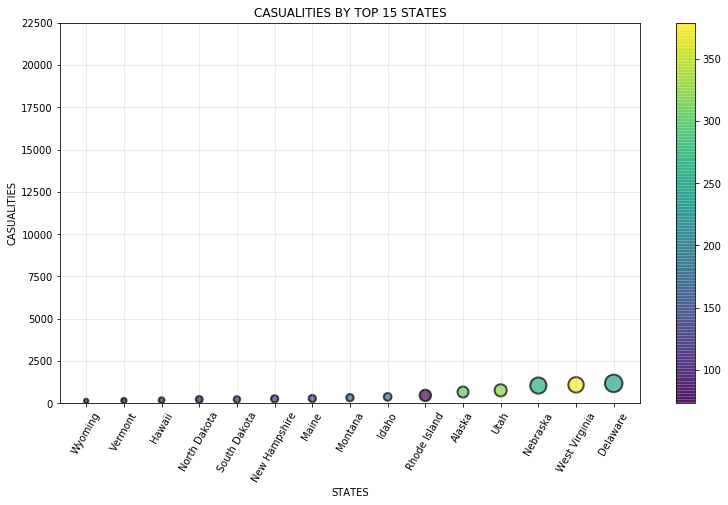

In [20]:
#in this plot we show the lowest 15 states with casualities
#those are the states that have less deaths and injuries 
#frim gun violence. The lowest states are Wyoming, Vermont an Hawaii.
gunv["casualities"] = gunv["number_of_deaths"] + gunv["number_of_injuries"]
gunv = gunv.sort_values(by = "casualities" ,ascending=True)
fig = plt.figure(figsize=(13,7))
plt.scatter(gunv["state"][:15],gunv["casualities"][:15],c=gunv["number_of_deaths"][:15],
            s=gunv["number_of_injuries"][:15]/3,linewidth=2,edgecolor = "k",alpha=.7)
plt.xticks(rotation = 60)
plt.yticks(np.arange(0,25000,2500))
fig.set_facecolor("w")
plt.xlabel("STATES")
plt.ylabel("CASUALITIES")
plt.colorbar()
plt.grid(True,alpha=.3)
print ("SIZES = INJURED ,COLOR = KILLED")
print ("********************************")
plt.title("CASUALITIES BY TOP 15 STATES")
plt.show()

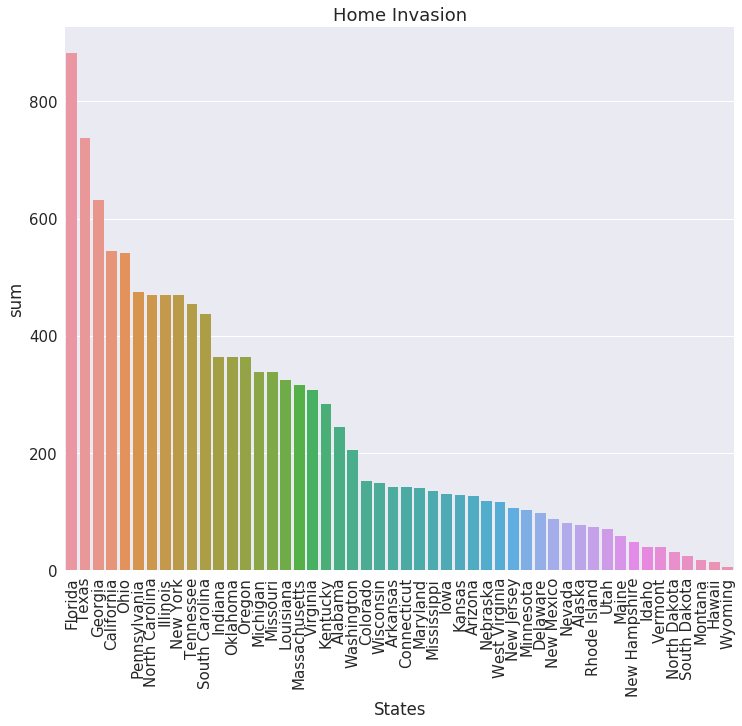

In [61]:
# this plot shows home invasion per state
#We can see that some trends continue
#we still have Florida, Califorina and Texas in the top 4
#sates with home invasion, which indicate that home invasions
#might be important reason of incidents, deaths and injuries
#from gun violence in the United States. Also, We can see that
#Georgia is in the top 4 of home invasions but it was not in the
#highest states with highest incidents and deaths
grouped = gunv.groupby('state')
g=grouped['home_invasion'].agg([np.sum]).reset_index().sort_values(by=('sum'),ascending=False)
plt.figure(figsize = (12, 10), facecolor = None)
sns.set_style("darkgrid")
sns.set(font_scale=1.5)
plot3 = sns.barplot(x="state", y="sum", data=g)

plot3.set_xticklabels(g['state'], rotation=90, ha="center")
plot3.set(xlabel='States',ylabel='sum')
plot3.set_title('Home Invasion')
plt.show()

<Figure size 1296x864 with 0 Axes>

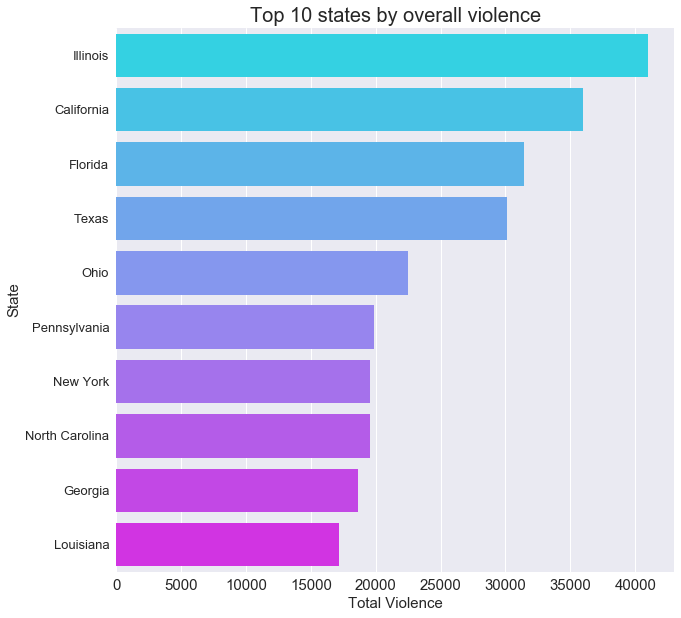

In [22]:
#in this plot we look at the top 10 states of the overall violence
#overall vilence is the sum of number of deaths, injuries, incidents
#mass shooting, officers involved and unintentional shooting
#We can see that California, Texas, Florida and Illinois are still
#the top four states in overall violence.
plt.figure(figsize=(18,12))
y = gunv.groupby(['state']).sum()
gunv["Total_Violence"] = gunv["number_of_deaths"] + gunv["number_of_injuries"] + gunv['total_number_of_incidents'] +gunv['mass_shooting']+ gunv['officer_involved_incident'] + gunv['home_invasion']+gunv['unintentional_shooting']
data = gunv.groupby(['state']).sum()['Total_Violence']
data = pd.DataFrame(data.sort_values(ascending=False))[0:10]
pub = data.index
colors = sns.color_palette("cool", len(data))
plt.figure(figsize=(10,10))
ax = sns.barplot(y = pub , x = 'Total_Violence', data=data, orient='h', palette=colors)
ax.set_xlabel(xlabel='Total Violence', fontsize=15)
ax.set_ylabel(ylabel='State', fontsize=15)
ax.set_title(label='Top 10 states by overall violence', fontsize=20)
ax.set_yticklabels(labels = pub, fontsize=13)
plt.show();

<Figure size 1296x864 with 0 Axes>

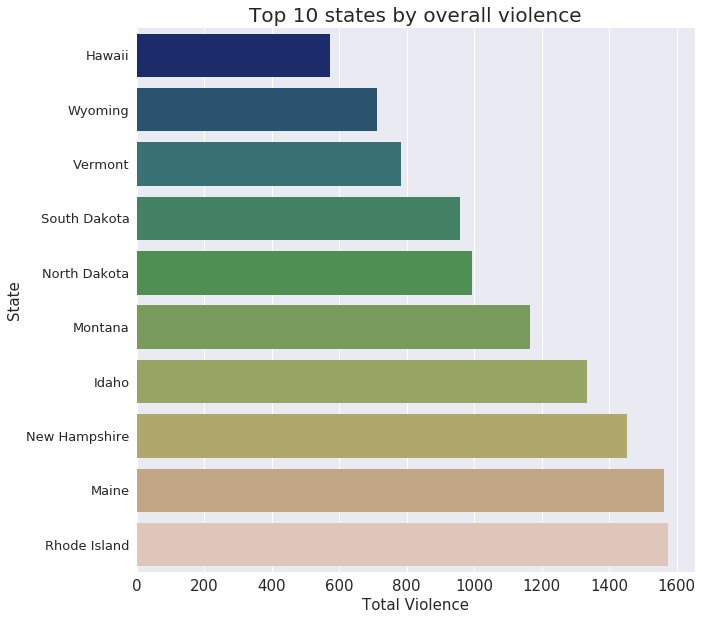

In [62]:
#We do the same plot as above but with the lowest 10 states 
#we can see that the same states are appearing again
#the states of Hawaii, Wyoming and Vermont are the lowest
plt.figure(figsize=(18,12))
y = gunv.groupby(['state']).sum()
gunv["Total_Violence"] = gunv["number_of_deaths"] + gunv["number_of_injuries"] + gunv['total_number_of_incidents'] +gunv['mass_shooting']+ gunv['officer_involved_incident'] + gunv['home_invasion']+gunv['unintentional_shooting']
data = gunv.groupby(['state']).sum()['Total_Violence']
data = pd.DataFrame(data.sort_values(ascending=True))[0:10]
pub = data.index
colors = sns.color_palette("gist_earth", len(data))
plt.figure(figsize=(10,10))
ax = sns.barplot(y = pub , x = 'Total_Violence', data=data, orient='h', palette=colors)
ax.set_xlabel(xlabel='Total Violence', fontsize=15)
ax.set_ylabel(ylabel='State', fontsize=15)
ax.set_title(label='Top 10 states by overall violence', fontsize=20)
ax.set_yticklabels(labels = pub, fontsize=13)
plt.show();

<Figure size 1296x864 with 0 Axes>

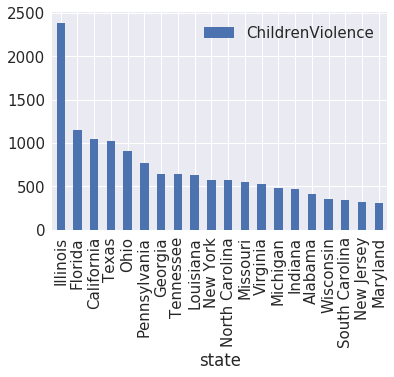

In [67]:
#this plot shows the number of teneegars involved in gun violence per state
#the teenagers here are under the age of 17
#As we can see from the plot below Illinois has the highest number of teenagers 
#involved in gun violence followed by Florida, California and Texas
#those are the same 4 highest states for incidents and deaths from gun violence
#this prove that Today’s children and teenagers are more prone to violence
plt.figure(figsize=(18,12))
children = gunv.groupby(['state']).sum()
gunv["ChildrenViolence"] = gunv['number_of_children'] + gunv['number_of_teens']
data123 = gunv.groupby(['state']).sum()['ChildrenViolence']
data123 = pd.DataFrame(data123.sort_values(ascending=False))[0:20]
data123.plot.bar()


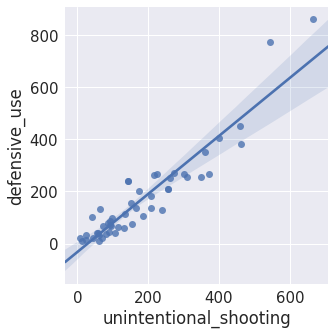

In [65]:
#this plot shows the relationship between defensive use and unintentional shooting 
#there is positive relationship so as the number as defensie use increase 
#unintentional shooting will increase. This indicate that defensive use is one of
#the resons for unintentional shooting 
sns.lmplot(x="unintentional_shooting", y="defensive_use", data=gunv)
plt.show()

# Now We are start working on the KAGGLE.COM dataset

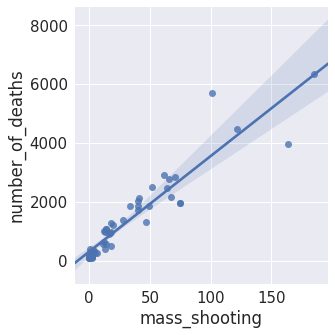

In [71]:
#this plot shows the relationship between mass shooting and total deaths
#As we can see from the plot mostly as the mass shootings increase
#the number of deaths will increase. According to the US Congressional Research 
#Service mass shooting is four or more shot and/or killed in a single event (incident)
#this shows that mass shootings are incidents with more people being killed or injured
sns.lmplot(x="mass_shooting", y="number_of_deaths", data=gunv)
#number_of_injuries
plt.show()

In [39]:
datas = pd.read_csv("violenceG.csv")
datas.head()

,incident_id,date,state,city_or_county,n_killed,n_injured,congressional_district,latitude,longitude,n_guns_involved
0,461105,1/1/2013,Pennsylvania,Mckeesport,0,4,14.0,40.3467,-79.8559,NaN
1,460726,1/1/2013,California,Hawthorne,1,3,43.0,33.9090,-118.3330,NaN
2,478855,1/1/2013,Ohio,Lorain,1,3,9.0,41.4455,-82.1377,2.0
3,478925,1/5/2013,Colorado,Aurora,4,0,6.0,39.6518,-104.8020,NaN
4,478959,1/7/2013,North Carolina,Greensboro,2,2,6.0,36.1140,-79.9569,2.0


In [40]:
# Columns for the dataset
columns1

Index(['incident_id', 'date', 'state', 'city_or_county', 'n_killed',
       'n_injured', 'congressional_district', 'latitude', 'longitude',
       'n_guns_involved'],
      dtype='object')

In [41]:
# data type of a dataset downloaded from kaggle.com
datas.get_dtype_counts()

float64    4
int64      3
object     3
dtype: int64

In [42]:
# length of dataset from kaggle
len_datas

239677

In [31]:
# shape of the dataset, this shows numbers of rows and columns
datas.shape

(239677, 29)

In [32]:
# size of the dataset
datas.size

6950633

In [33]:
# it gives us brief information about the dataset
datas.describe()

,incident_id,n_killed,n_injured,congressional_district,latitude,longitude,n_guns_involved,state_house_district,state_senate_district
count,2.396770e+05,239677.000000,239677.000000,227733.000000,231754.000000,231754.000000,140226.000000,200905.000000,207342.00000
mean,5.593343e+05,0.252290,0.494007,8.001265,37.546598,-89.338348,1.372442,55.447132,20.47711
std,2.931287e+05,0.521779,0.729952,8.480835,5.130763,14.359546,4.678202,42.048117,14.20456
min,9.211400e+04,0.000000,0.000000,0.000000,19.111400,-171.429000,1.000000,1.000000,1.00000
25%,3.085450e+05,0.000000,0.000000,2.000000,33.903400,-94.158725,1.000000,21.000000,9.00000
50%,5.435870e+05,0.000000,0.000000,5.000000,38.570600,-86.249600,1.000000,47.000000,19.00000
75%,8.172280e+05,0.000000,1.000000,10.000000,41.437375,-80.048625,1.000000,84.000000,30.00000
max,1.083472e+06,50.000000,53.000000,53.000000,71.336800,97.433100,400.000000,901.000000,94.00000


In [34]:
# information about dataset
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 29 columns):
incident_id                    239677 non-null int64
date                           239677 non-null object
state                          239677 non-null object
city_or_county                 239677 non-null object
address                        223180 non-null object
n_killed                       239677 non-null int64
n_injured                      239677 non-null int64
incident_url                   239677 non-null object
source_url                     239209 non-null object
incident_url_fields_missing    239677 non-null bool
congressional_district         227733 non-null float64
gun_stolen                     140179 non-null object
gun_type                       140226 non-null object
incident_characteristics       239351 non-null object
latitude                       231754 non-null float64
location_description           42089 non-null object
longitude                    

Text(0.5,1,'Cities or Counties with highest number of Gun Violence')

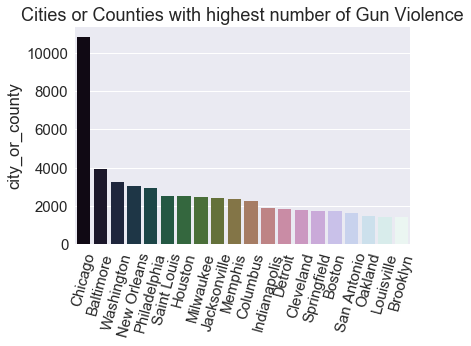

In [35]:
#now we move from states and look at the cities with the highest
#gun violence in the United States. We can see that Chicago, Baltimore 
#Washignton DC are the highest cities in gun violence.
#it is intresting that there are only two cities from
#the top four states, which are Chicagoand Houston. 
topcitywise_crime_rate = datas["city_or_county"].value_counts().head(20)
topcitywise_crime_rate_plot = sns.barplot(x=topcitywise_crime_rate.index, y=topcitywise_crime_rate, palette='cubehelix')
topcitywise_crime_rate_plot.set_xticklabels(topcitywise_crime_rate_plot.get_xticklabels(), rotation=75)
topcitywise_crime_rate_plot.set_title("Cities or Counties with highest number of Gun Violence")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


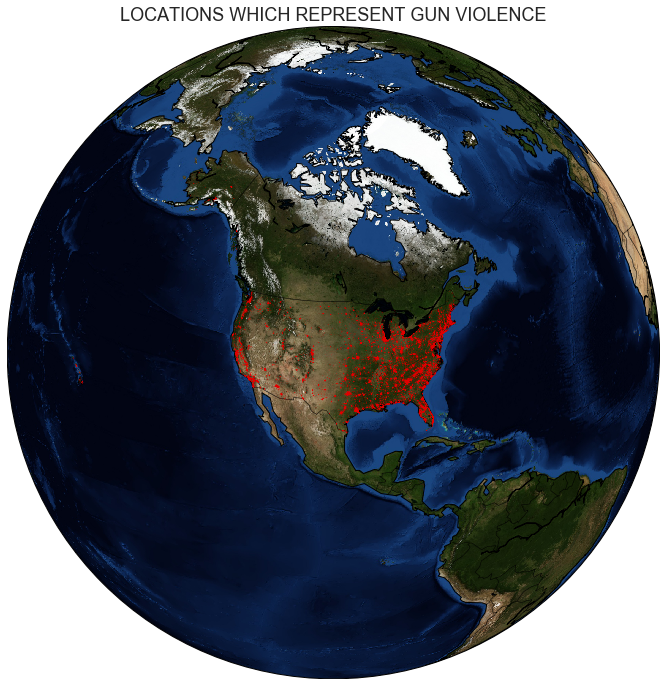

In [36]:
#here we show the map of the United States with the highest 
#places (cities) with gun violence
#we see that it is mostly spread in the east, west cost 
#and the south. With red points almost everywhere except 
#the centre areas of the country.
import os
import conda

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

from mpl_toolkits.basemap import Basemap

map1 =datas[datas["latitude"].notnull()]
map1 = map1[["latitude","longitude","state","city_or_county"]]

m=Basemap(lat_0=40, lon_0=-100, projection='ortho' )

lat = list(map1["latitude"].values)
lon = list(map1["longitude"].values)
x,y = m(lon,lat)
fig = plt.figure(figsize=(12,12))
m.plot(x,y,"go",markersize =.2,color="RED")
m.drawcountries()
m.drawcoastlines()
m.bluemarble(scale=1)
plt.title("LOCATIONS WHICH REPRESENT GUN VIOLENCE")
plt.show()

/usr/local/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1699: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/usr/local/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3224: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/local/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3233: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


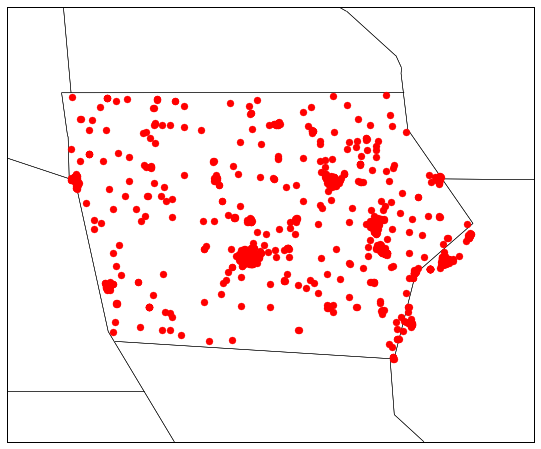

In [75]:
#this map shows the number of incidents of gun violence in the state of Iowa
#As we can see from the map there is more concentration of re dots on the 
#bigger cities with more population like Des Moines, Iowa city and Cedar Rapids
#The same happens when we look at Illinois, there is a lot of red dots around 
#Chicago comparing to the rest of the state. This also confirm the trend that 
#we have been seeing of the big cities in the states with th mopst incidents
#of gun violence
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pandas as pd
import io
fig = plt.figure(num=None, figsize=(12, 8) )
# total attack(killed + injured) 
datas["total_attack"] = datas.n_killed + datas.n_injured

Iowa = datas[datas.state == "Iowa"]

# read in data to use for plotted points

lat = Iowa['latitude'].values
lon = Iowa['longitude'].values

# determine range to print based on min, max lat and lon of the data
margin = 1 # buffer to add to the range
lat_min = min(lat) - margin
lat_max = max(lat) + margin
lon_min = min(lon) - margin
lon_max = max(lon) + margin

# create map using BASEMAP
m = Basemap(llcrnrlon=lon_min,
            llcrnrlat=lat_min,
            urcrnrlon=lon_max,
            urcrnrlat=lat_max,
            lat_0=(lat_max - lat_min)/2,
            lon_0=(lon_max-lon_min)/2,
            projection='merc',
            resolution = 'c',
            area_thresh=1000000.,
            )
m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color = 'white',lake_color='#46bcec')
# convert lat and lon to map projection coordinates
lons, lats = m(lon, lat)
# plot points as red dots
m.scatter(lons, lats, marker = 'o', color='r', zorder=2)
plt.show()

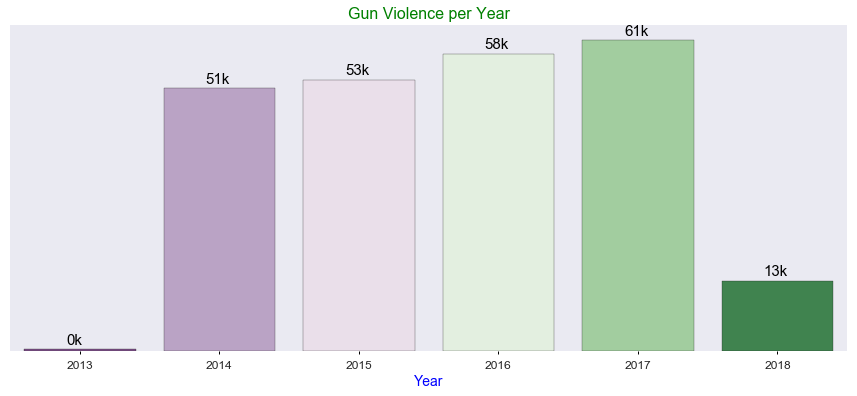

In [38]:
#here we plot gun violence incidents per year in the past 4 years
#we can see that the gun violence is increasing every year
#in the past 4 years to reach 61000 incidents in 2017.
#this year so far there was 13000 incidents, thsi counts only
#till March 31st 2018. 
datas['date'] = pd.to_datetime(datas.date)

datas['year'] = [datas.date[i].year for i in range(len(datas.date))]

f,ax=plt.subplots(figsize = (15,6))
year_count = datas['year'].value_counts()
sns.barplot(y=year_count.values,x=year_count.index,ax=ax,palette='PRGn',edgecolor='0.1')
for i in ax.patches:
    ax.text(i.get_x()+0.3,i.get_height()+1000,
            str(int(i.get_height()/1000))+'k',color='black',fontsize=15)
ax.tick_params(length=3,color='black',labelsize=12)
ax.set_xlabel('Year',color='Blue',fontsize=14)
ax.set_title('Gun Violence per Year',fontsize=16,color='Green')
y_axis = ax.axes.get_yaxis().set_visible(False)
sns.despine(left=True)
plt.show()

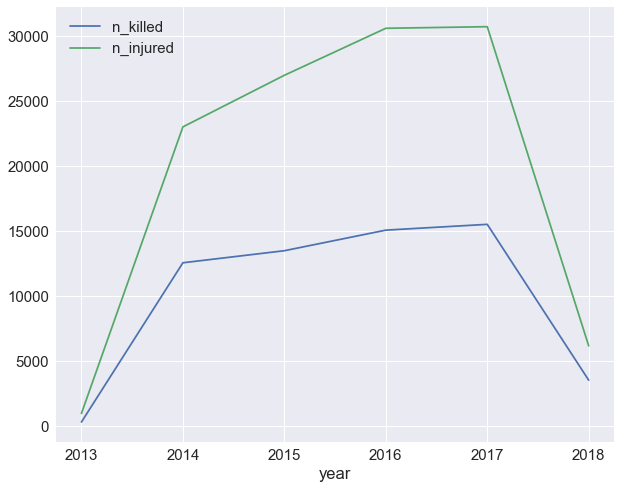

In [39]:
#this plot shows the graph of number of people killed and
#with number of people injured seperately in the past 4 years
#there is increase  in both, but the number of people injuries is
#increasing more, we disregard the decrease in 2018 because it does not
#include data from the whole year.
datas['date']=pd.to_datetime(datas['date'])
datas['year']=datas['date'].dt.year
df_year=datas.groupby(['year'])['n_killed','n_injured'].agg('sum')

df_year.plot(figsize=(10,8))

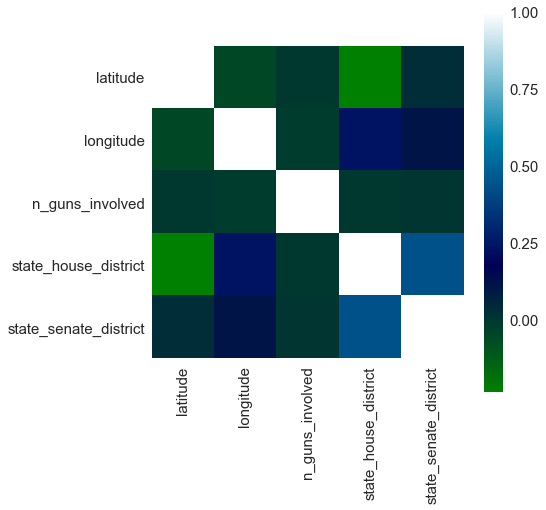

In [40]:
#here we show the correlations of our Kaggle dataset
#it shows taht there are some positive relationships
#between variables like state senate district and state
#house district.
corr = datas.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].corr()
plt.figure(figsize=(7, 7))
sns.heatmap(corr, vmax=1, square=True, cmap = 'ocean')